# 2020-09-11 Exam - Association Rules

0. read a market basket database from the csv file provided and generate a dataframe basket of boolean values with one row per transaction and one column per distinct item of the database; the dataframe values must be True if a distinct item is contained in the transaction
    
    • the file contains one transaction per line, the first element is the number of items in the transaction, followed by the items of the transaction, and then a variable number of empty fields

    • the field names in the first row of the csv file are not relevant

1. ignore the transactions containing a single item (2 points)

2. the column names of the output dataframe are the distinct items (2 points)

3. show the first five rows of the output dataframe (1 point)

4. show the number of transactions and of distinct items (1 point)

5. find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items (5 points)

    • output the result with the message below

    • min_support: 0.xxxx - number of itemsets with at least 2 items: nn)

6. find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points)

    • use "confidence" as metric and output the line below:

    • Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n

7. print the first 10 rules found, sorted by descending confidence and support (3 points)

8. plot confidence and support for all the sorted rules found (3 points)

9. scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule (hint https://stackoverflow.com/questions/14432557/matplotlibscatter-plot-with-different-text-at-each-data-point) (3 points)

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

url = 'mba.csv'
random_state = 42

## 0. read a market basket database from the csv file provided and generate a dataframe basket of boolean values with one row per transaction and one column per distinct item of the database; the dataframe values must be True if a distinct item is contained in the transaction
    
    • the file contains one transaction per line, the first element is the number of items in the transaction, followed by the items of the transaction, and then a variable number of empty fields

    • the field names in the first row of the csv file are not relevant



In [109]:
file = open(url)
transactions = [line.strip("\n").split(',') for line in file.readlines()]
transactions = transactions[1:]

In [110]:
util = []
for transaction in transactions:
    num_items = int(transaction[0])
    util.append(transaction[1:num_items+1])
transactions = util

In [111]:
from mlxtend.preprocessing import TransactionEncoder
enc = TransactionEncoder()
X = pd.DataFrame(enc.fit_transform(transactions))
X

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 1. ignore the transactions containing a single item (2 points)



In [112]:
idx_to_remove = []
for idx, row in X.iterrows():
    count = 0
    for i in X.columns:
        if(row[i] == True):
            count+=1
    if(count <= 1): 
        idx_to_remove.append(idx)
            
print('Removing {} rows with only 1 item..'.format(len(idx_to_remove)))
X.drop(index=idx_to_remove, inplace=True)
print('New shape is ', X.shape)

Removing 2159 rows with only 1 item..
New shape is  (7676, 169)


## 2. the column names of the output dataframe are the distinct items (2 points)



In [116]:
X.columns = enc.columns_

## 3. show the first five rows of the output dataframe (1 point)



In [117]:
X.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


## 4. show the number of transactions and of distinct items (1 point)



In [115]:
print('There are {} distrinct transactions and {} distinct items'.format(X.shape[0], X.shape[1]))

There are 7676 distrinct transactions and 169 distinct items


## 5. find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items (5 points)

    • output the result with the message below

    • min_support: 0.xxxx - number of itemsets with at least 2 items: nn)



In [156]:
from mlxtend.frequent_patterns import apriori

min_itemset = 8
min_items_in_itemset = 2
min_support = 0

for support in np.arange(1, 0.01, -0.01):
    #print('Trying support {:.2f}..'.format(support))
    frequent_itemset = apriori(X, min_support=support, use_colnames=True)
    itemsets_cond = sum([len(itemset) >= min_items_in_itemset for itemset in frequent_itemset.itemsets])
    if(itemsets_cond >= min_itemset):
        min_support = support
        break

if(min_support == 0):
    print('Nothing found!')
else:
    print('min_support: {:.4f} - number of itemsets with at least {} items: {}'.format(min_support, min_items_in_itemset, itemsets_cond))

min_support: 0.0500 - number of itemsets with at least 2 items: 9


## 6. find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points)

    • use "confidence" as metric and output the line below:

    • Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n



In [157]:
from mlxtend.frequent_patterns import association_rules

min_rules = 10
min_metric = 0

for metric_threshold in np.arange(10, 0.01, -0.01):
    rules = association_rules(frequent_itemset, metric='confidence', min_threshold=metric_threshold)
    if(len(rules) > 10):
        min_metric = metric_threshold
        break
    
if(min_metric == 0):
    print('Nothing found!')
else:
    print('Metric: "confidence" - min_metric: {:.4f} - Number of rules: {}'.format(min_metric, len(rules)))

Metric: "confidence" - min_metric: 0.2400 - Number of rules: 11


## 7. print the first 10 rules found, sorted by descending confidence and support (3 points)



In [160]:
rules.sort_values(by=['confidence', 'support'],ascending=False, inplace=True, ignore_index=True)
rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(root vegetables),(whole milk),0.136399,0.311621,0.062663,0.459408,1.474254,0.020158,1.273380,0.372499
1,(root vegetables),(other vegetables),0.136399,0.239838,0.060709,0.445081,1.855754,0.027995,1.369861,0.533968
2,(yogurt),(whole milk),0.173528,0.311621,0.071782,0.413664,1.327459,0.017707,1.174035,0.298475
3,(tropical fruit),(whole milk),0.131449,0.311621,0.054195,0.412289,1.323049,0.013233,1.171290,0.281123
4,(other vegetables),(whole milk),0.239838,0.311621,0.095883,0.399783,1.282915,0.021145,1.146884,0.290103
5,(rolls/buns),(whole milk),0.221470,0.311621,0.072564,0.327647,1.051429,0.003549,1.023836,0.062828
6,(yogurt),(other vegetables),0.173528,0.239838,0.055628,0.320571,1.336610,0.014009,1.118823,0.304715
7,(whole milk),(other vegetables),0.311621,0.239838,0.095883,0.307692,1.282915,0.021145,1.098011,0.320354
8,(other vegetables),(root vegetables),0.239838,0.136399,0.060709,0.253123,1.855754,0.027995,1.156283,0.606628
9,(soda),(whole milk),0.203101,0.311621,0.051329,0.252726,0.811006,-0.011962,0.921187,-0.226263


## 8. plot confidence and support for all the sorted rules found (3 points)



<Axes: >

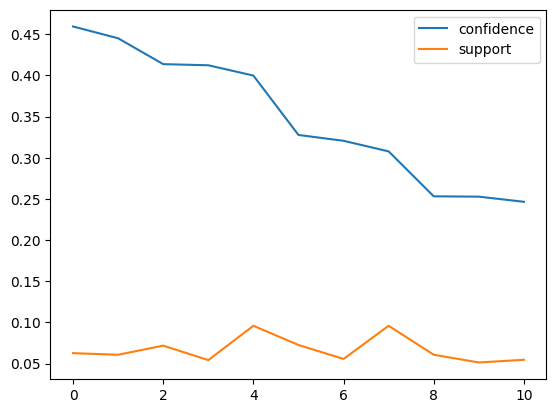

In [161]:
rules[['confidence', 'support']].plot()

## 9. scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule (hint https://stackoverflow.com/questions/14432557/matplotlibscatter-plot-with-different-text-at-each-data-point) (3 points)

<Axes: xlabel='confidence', ylabel='support'>

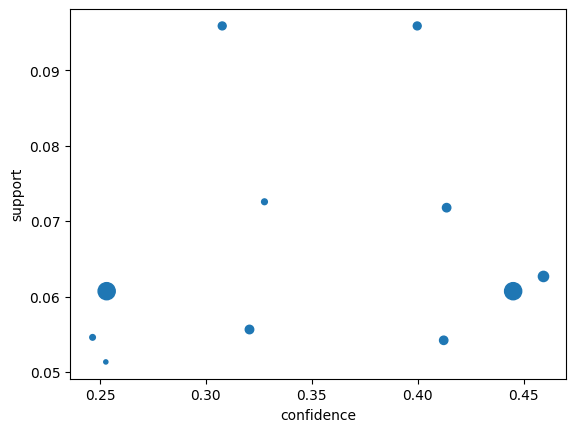

In [164]:
rules.plot.scatter(x='confidence', y='support', s=[15**n for n in rules.lift])